# **Module**: Univariate Statistical Process Monitoring
## **Lecture**: CUSUM Control Chart
### *Topic*:  CUSUM Control Chart with 0.5 X sigma drift in mean 

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

In [2]:
# ==================================================================================
#                        Generate fault-free samples
# ==================================================================================

> ##### we will start with generating some fault-free samples to represent the model-training dataset

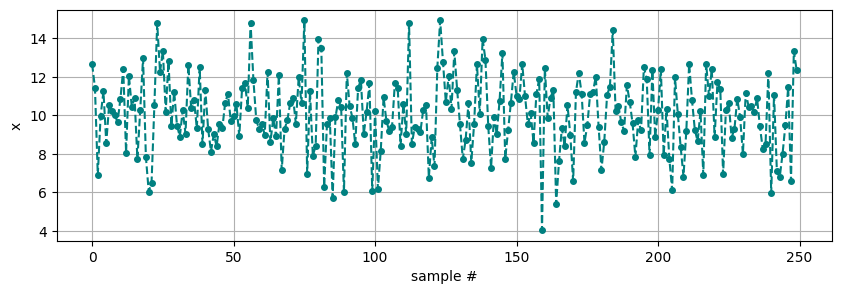

In [3]:
# generate NOC (normal operation condition) data
N = 250 # 250 observation samples
x_faultFree = np.random.normal(loc=10, scale=2, size=N) # mean=10; standard deviation=2

# plot NOC data
plt.figure(figsize=(10,3))
plt.plot(x_faultFree,'--', marker='o', markersize=4, color='teal')
plt.xlabel('sample #'), plt.ylabel('x')
plt.grid()
plt.show()


In [4]:
# ==================================================================================
#                                    Model Training
# ==================================================================================

> ##### we will use the NOC data to estimate the CUSUM control chart parameters, which are the mean (mu) and standard deviation (sigma) of the signal, and the Control limit (H)

In [5]:
# estimate CUSUM model parameters and plot control chart for NOC data
mu, sigma = np.mean(x_faultFree), np.std(x_faultFree)
k = 0.25*sigma
H = 5*sigma

print(f'CUSUM chart control limit: {H}')

CUSUM chart control limit: 9.765931343973723


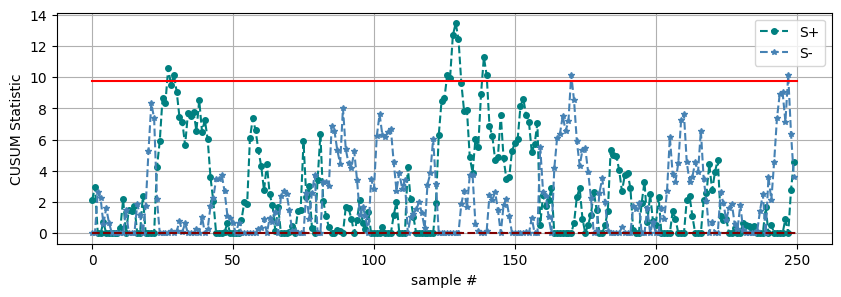

In [6]:
# compute CUSUM statistic for NOC data
S_positive = np.zeros((len(x_faultFree),))
S_negative = np.zeros((len(x_faultFree),))

for i in range(len(x_faultFree)):
    if i==0:
        S_positive[i] = np.max([0, x_faultFree[i]-(mu+k)])
        S_negative[i] = np.max([0, (mu-k)-x_faultFree[i]])  
    else:
        S_positive[i] = np.max([0, x_faultFree[i]-(mu+k) + S_positive[i-1]])
        S_negative[i] = np.max([0, (mu-k)-x_faultFree[i] + S_negative[i-1]])

# plot control chart for NOC data
plt.figure(figsize=(10,3))
plt.plot(S_positive,'--',marker='o', markersize=4, color='teal', label='S+')
plt.plot(S_negative,'--',marker='*', markersize=4, color='steelblue', label='S-')
plt.plot([0,N],[H,H], color='red')
plt.plot([0,N],[0,0], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('CUSUM Statistic')
plt.grid(), plt.legend()
plt.show()

In [7]:
# ==================================================================================
#               Generate faulty test samples and plot on control chart
# ==================================================================================

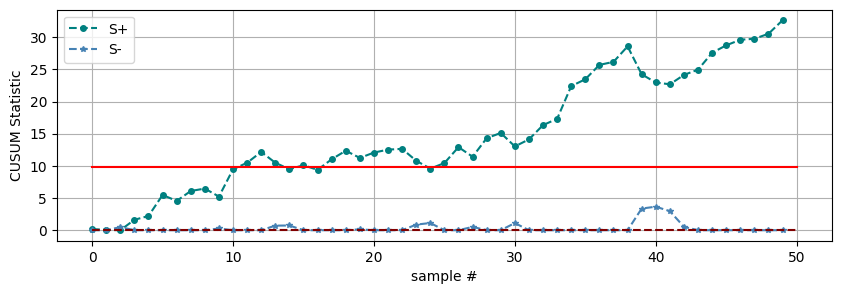

In [8]:
# faulty data
N_faulty = 50 # 50 observation samples
x_test = np.random.normal(loc=11, scale=2, size=N_faulty) # mean=10+0.5*2; standard deviation=2

# CUSUM statistic for test data
S_positive_test = np.zeros((len(x_test),))
S_negative_test = np.zeros((len(x_test),))

for i in range(len(x_test)):
    if i==0:
        S_positive_test[i] = np.max([0, x_test[i]-(mu+k)])
        S_negative_test[i] = np.max([0, (mu-k)-x_test[i]]) 
    else:
        S_positive_test[i] = np.max([0, x_test[i]-(mu+k) + S_positive_test[i-1]])
        S_negative_test[i] = np.max([0, (mu-k)-x_test[i] + S_negative_test[i-1]])

# plot control chart for test data
plt.figure(figsize=(10,3))
plt.plot(S_positive_test,'--',marker='o', markersize=4, color='teal', label='S+')
plt.plot(S_negative_test,'--',marker='*', markersize=4, color='steelblue', label='S-')
plt.plot([0,N_faulty],[H,H], color='red')
plt.plot([0,N_faulty],[0,0], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('CUSUM Statistic')
plt.grid(), plt.legend()
plt.show()

In [9]:
# ==================================================================================
#         control chart for all samples (fault-free and faulty) combined
# ==================================================================================

In [10]:
# # combine data
x_combined = np.hstack((x_faultFree, x_test))
print(f'shape of x_faultfree = {x_faultFree.shape}')
print(f'shape of x_test = {x_test.shape}')
print(f'shape of x_combined = {x_combined.shape}')

shape of x_faultfree = (250,)
shape of x_test = (50,)
shape of x_combined = (300,)


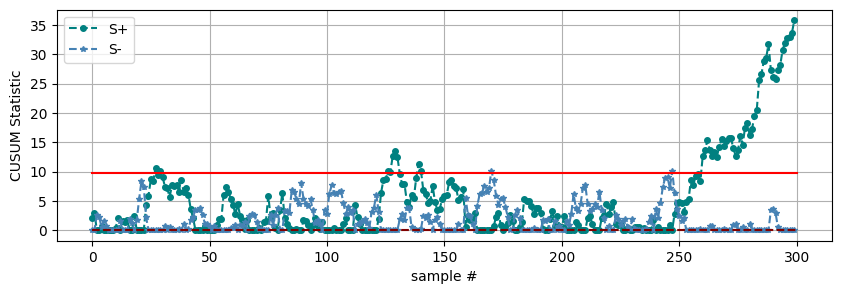

In [11]:
# CUSUM statistics and control chart for combined data
S_positive = np.zeros((len(x_combined),))
S_negative = np.zeros((len(x_combined),))

for i in range(len(x_combined)):
    if i==0:
        S_positive[i] = np.max([0, x_combined[i]-(mu+k)])
        S_negative[i] = np.max([0, (mu-k)-x_combined[i]]) 
    else:
        S_positive[i] = np.max([0, x_combined[i]-(mu+k) + S_positive[i-1]])
        S_negative[i] = np.max([0, (mu-k)-x_combined[i] + S_negative[i-1]])

plt.figure(figsize=(10,3))
plt.plot(S_positive,'--',marker='o', markersize=4, color='teal', label='S+')
plt.plot(S_negative,'--',marker='*', markersize=4, color='steelblue', label='S-')
plt.plot([0,len(x_combined)],[H,H], color='red')
plt.plot([0,len(x_combined)],[0,0], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('CUSUM Statistic')
plt.grid()
plt.legend()
plt.show()